In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling as pp
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('../capstone_data/final_df.csv')

In [28]:
df = df.loc[df.GDP_per_capita < 100000]

In [29]:
len(df)

61240

In [30]:
df = df.set_index(['Year','Zipcode'])

## Number of breweries and brewery sizes over time

In [31]:
#select brewery columns
brewery_df = df.filter(regex = 'Breweries')

In [32]:
brewery_df.head()

Breweries_All  Breweries_Small  Breweries_Medium  \
Year Zipcode                                                     
2012 29445              0.0              0.0               0.0   
     29448              0.0              0.0               0.0   
     29455              0.0              0.0               0.0   
     29456              0.0              0.0               0.0   
     29458              0.0              0.0               0.0   

              Breweries_Large  Breweries_XL  
Year Zipcode                                 
2012 29445                0.0           0.0  
     29448                0.0           0.0  
     29455                0.0           0.0  
     29456                0.0           0.0  
     29458                0.0           0.0

In [33]:
brewerytotals_df = brewery_df.groupby(['Year']).sum()

In [34]:
brewerytotals_df.head()

,Breweries_All,Breweries_Small,Breweries_Medium,Breweries_Large,Breweries_XL
Year,,,,,
2012,877.0,559.0,219.0,73.0,26.0
2013,1550.0,1148.0,296.0,80.0,26.0
2014,1735.0,1194.0,414.0,99.0,28.0
2015,2331.0,1604.0,573.0,125.0,29.0
2016,2789.0,1796.0,797.0,162.0,34.0


In [35]:
#create lists for each bar
smallbrew = list(brewerytotals_df.Breweries_Small)
medbrew = list(brewerytotals_df.Breweries_Medium)
largebrew = list(brewerytotals_df.Breweries_Large)
xlbrew = list(brewerytotals_df.Breweries_XL)
#set heights for each bar
h1 = np.add(smallbrew, medbrew)
h2 = np.add(h1,largebrew)

#set locations and bar width
ind = np.arange(5)
width = .6

In [36]:
df['Breweries_Small']= pd.to_numeric(df.Breweries_Small, errors = 'coerce')
df['all_age_median']= pd.to_numeric(df.all_age_median, errors = 'coerce')
df['Income_Median']= pd.to_numeric(df.Income_Median, errors = 'coerce')
df['Breweries_Large'] = pd.to_numeric(df.Breweries_Large, errors='coerce')
df['Breweries_Medium']= pd.to_numeric(df.Breweries_Medium, errors='coerce')

## Q. How has the amount of different sizes of breweries changed from 2012-2016?

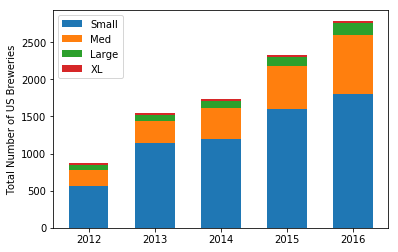

In [37]:
p1 = plt.bar(ind, smallbrew, width)
p2 = plt.bar(ind, medbrew, width, bottom = smallbrew)
p3 = plt.bar(ind, largebrew, width, bottom = h1)
p4 = plt.bar(ind, xlbrew, width, bottom = h2)

plt.ylabel('Total Number of US Breweries')
plt.xticks(ind, ('2012', '2013', '2014','2015','2016'))
plt.legend((p1[0],p2[0], p3[0],p4[0]),('Small','Med','Large','XL'))

In [38]:
plt.show()


## relationship of variables to small breweries

In [56]:
#melt df to get size column for categorical plotting purposes
keep_cols = df.columns[~df.columns.str.contains('Breweries')]
var_cols = df.columns[df.columns.str.contains('Breweries')]



TypeError: unhashable type: 'Index'

### Q. What is the relationship between the population and number of small breweries?

c:\programdata\miniconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
c:\programdata\miniconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


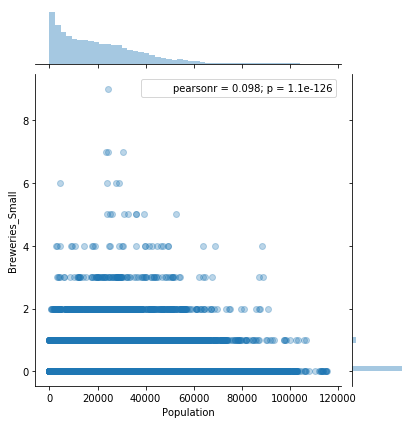

In [39]:
sns.jointplot(x=df.Population, y = df.Breweries_Small, kind = 'scatter', alpha = .3)

#### Insights: It is interesting that population has only a small correlation to the number of breweries, with r = 0.098. I had hypothesized that population would be strongly correlated with number of breweries, with more people meaning more potential business. 

### Q. How does GDP per capita relate to the number of small breweries in an area? 


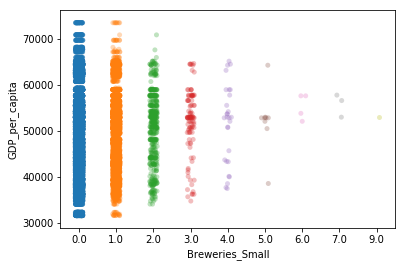

In [43]:
sns.stripplot(x=df.Breweries_Small, y=df.GDP_per_capita, jitter = True, alpha = .3)

#### Insights: There is seems to be a clustering of breweries in the middle, and normal(ish) distribution. Has a very, very small positive correlation. This aligns with what I would expect, that a higher gdp would suppport more breweries. There seems to be a sweet spot in the middle. I wonder if highly productive economies are not able to support breweries, or vice versa.

### Q. What is the relationship between median age, and the number of small breweries in an area?

c:\programdata\miniconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
c:\programdata\miniconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


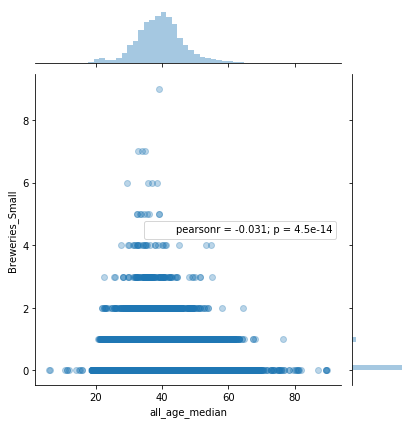

In [19]:
sns.jointplot(x= df.all_age_median, y=df.Breweries_Small, kind = 'scatter', alpha = .3 )

#### Insights: A pretty obvious normal distribution, and a negative correlation between median age and small breweries. This aligns with what I would expect, that there are more breweries where there are more young people. 

### Q. Is there a relationship between the number of higher education intitutions and small breweries in an area?

In [ ]:
sns.jointplot(x = df['Colleges, universities, and professional schools_All'], y=df.Breweries_Small, kind='scatter', alpha = .3)

#### Insights: Visually, it would appear that there is a steep negative relationship between colleges and breweries. This is the opposite of what I would expect to find, and opposite of what is reflected by the r value, Which indicates that there is slightly positive relationship between colleges and breweries. Weird.

### Q. What is the relationship between median income and number of small breweries?

In [ ]:
sns.jointplot(x=df['Income_Median'], y=df.Breweries_Small, kind='scatter', alpha = .3)

#### Insights: The Distribution is skewed torwards the left. It looks like there is a sweet spot for income, right around 50,000 dollars. 

### Q. Does having larger breweries in the area affect the number of small breweries in that area? 

In [ ]:
sns.jointplot(x=df['Breweries_Medium'], y=df.Breweries_Small, kind='scatter', alpha =.3)

In [ ]:
sns.jointplot(x=df.Breweries_Large, y=df.Breweries_Small, kind = 'reg')


#### Insights: Even though these appear to have a negative relationship, visually, both medium, and large breweries have a very slight positive correlation with small breweries. 

### General Conclusions: The p value on all examined coefficients, except for medium breweries, is much less than 0.05, denoting that all for all of those variables, the coefficient is highly significant. Hopefully, this is indication that a successful model, prediting the number of small breweries in an area, can be built using these variables and more. 